# Train Data

In [1]:
import datetime as dt
import yfinance as yf
import pandas as pd
from ta.volatility import BollingerBands

In [2]:
btc = yf.Ticker("BTC-USD")

startDate = dt.datetime(2016,1,1)
endDate = dt.datetime(2021,1,1)

btcTrain = btc.history(start=startDate, end=endDate)[["Open", "High", "Low", "Close"]]

bollinger = BollingerBands(close=btcTrain["Close"], window=20, window_dev=2)
btcTrain['Bollinger'] = bollinger.bollinger_hband()

startDate = dt.datetime(2016,1,1)
endDate = dt.datetime(2021,1,1)

btcTrain["Next Day"] = btc.history(start=startDate, end=endDate)["Close"]

# Index Esitleme
startDate = dt.datetime(2016,1,2)
endDate = dt.datetime(2021,1,2)
NextDay = btc.history(start=startDate, end=endDate)[["Close"]]
NextDay.set_index(btcTrain.index, inplace=True)
btcTrain["Next Day"] = NextDay["Close"]

btcTrain=btcTrain[19:]
btcTrain.head()

,Open,High,Low,Close,Bollinger,Next Day
Date,,,,,,
2016-01-19,387.026001,387.730011,378.971985,380.148987,477.446889,420.230011
2016-01-20,379.739990,425.266998,376.598999,420.230011,476.861536,410.261993
2016-01-21,419.631989,422.877014,406.299988,410.261993,475.699907,382.492004
2016-01-22,409.751007,410.410004,375.282013,382.492004,475.558275,387.490997
2016-01-23,382.433990,394.542999,381.980988,387.490997,474.902889,402.971008


# Test Data

In [3]:
btc = yf.Ticker("BTC-USD")

startDate = dt.datetime(2021,1,1)
endDate = dt.datetime(2022,1,1)

btcTest = btc.history(start=startDate, end=endDate)[["Open", "High", "Low", "Close"]]

bollinger = BollingerBands(close=btcTest["Close"], window=20, window_dev=2)
btcTest["Bollinger"] = pd.DataFrame(bollinger.bollinger_hband()).set_index(btcTest.index)

startDate = dt.datetime(2021,1,1)
endDate = dt.datetime(2022,1,1)

btcTest["Next Day"] = btc.history(start=startDate, end=endDate)["Close"]

# Index Esitleme
startDate = dt.datetime(2021,1,2)
endDate = dt.datetime(2022,1,2)
NextDay = btc.history(start=startDate, end=endDate)[["Close"]]
NextDay.set_index(btcTest.index, inplace=True)
btcTest["Next Day"] = NextDay["Close"]

btcTest=btcTest[19:]
btcTest.head()

,Open,High,Low,Close,Bollinger,Next Day
Date,,,,,,
2021-01-19,36642.234375,37755.890625,36069.804688,36069.804688,42125.853513,35547.750000
2021-01-20,36050.113281,36378.328125,33570.476562,35547.750000,41704.938542,30825.699219
2021-01-21,35549.398438,35552.679688,30250.750000,30825.699219,41473.107131,33005.761719
2021-01-22,30817.625000,33811.851562,28953.373047,33005.761719,41404.043859,32067.642578
2021-01-23,32985.757812,33360.976562,31493.160156,32067.642578,41464.214588,32289.378906


___

In [4]:
y_train, X_train = btcTrain["Next Day"], btcTrain.drop("Next Day", axis=1)

# Statsmodels

In [5]:
import statsmodels.api as sm

In [6]:
lm = sm.OLS(y_train, X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Next Day   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          1.888e+05
Date:                Thu, 13 Jan 2022   Prob (F-statistic):                        0.00
Time:                        02:37:49   Log-Likelihood:                         -13118.
No. Observations:                1809   AIC:                                  2.625e+04
Df Residuals:                    1804   BIC:                                  2.627e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Open           0.0257      0.053      0.486      0.627      -0.078       0.130
High          -0.0548      0.065     -0.848      0.397      -0.182       0.072
Low           -0.0607      0.054     -1.131      0.258      -0.166       0.045
Close          1.0981      0.064     17.058      0.000       0.972       1.224
Bollinger     -0.0053      0.009     -0.603      0.546      -0.022       0.012
==============================================================================
Omnibus:                      444.377   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23564.121
Skew:                           0.189   Prob(JB):                         0.00
Kurtosis:                      20.677   Cond. No.                         237.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Sklearn

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
skitLm = LinearRegression()
modelSkiLm = skitLm.fit(X_train, y_train)

## Visualitizion

In [9]:
import seaborn as sns

In [10]:
prediction = []
for i in range(btcTest.shape[0]):
    data = []
    for j in range(5):
        data.append([btcTest.iloc[i][j]])
    data = pd.DataFrame(data).T
    prediction.append(modelSkiLm.predict(data)[0])

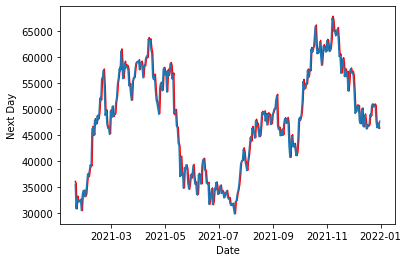

In [11]:
sns.lineplot(y=prediction, x=btcTest.index,color="red")
sns.lineplot(y=btcTest["Next Day"], x=btcTest.index);